# Análise Exploratória dos Dados
- Vamos começar analisando na base gerada na etapa anterior
- Vamos transformar nossos dados de forma que podemos utilizá-los no modelo

In [2]:
# Importando a base
import pandas as pd
treino = pd.read_csv('train_2.csv')
teste = pd.read_csv('test_2.csv')
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,12,2008,WD,Normal,250000


In [3]:
# Visualizando o shape das bases
print(treino.shape)
print(teste.shape)

(1460, 81)
(1459, 80)


In [4]:
# Podemos verificar novamente as informações dessa base
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# E também a quantidade de colunas de cada tipo
treino.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
# Verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False).head(9)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
dtype: int64

- Por mais que o Id tenha uma alta cardinalidade, não vamos eliminar esse valor pois vamos usá-lo para fazer a submissão do nosso código.

- **Vamos entender melhor a variável target (SalePrice).**

In [9]:
# Visualizando a descrição estatística
treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

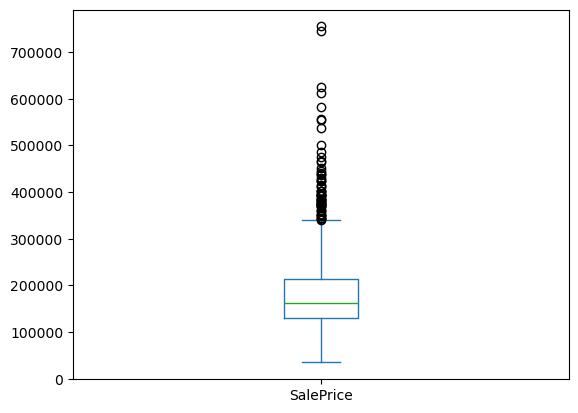

In [10]:
# Visualizando um boxplot
treino.SalePrice.plot.box();

- **Podemos avaliar diretamente a correlação das variáveis numéricas.**

In [12]:
# Selecionando os dados numéricos
treino_num = treino.select_dtypes("number")

# Criando uma matriz de correlação
treino_num.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.012123,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050644,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.355968,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022892,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.012123,-0.355968,1.000000,0.299801,0.230066,-0.049078,0.113063,0.075544,0.176146,0.209987,...,0.076238,0.139456,0.014421,0.053889,0.037605,0.172899,-0.009775,0.011553,-0.003065,0.330222
LotArea,-0.033226,-0.139781,0.299801,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103222,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.230066,0.105806,1.000000,-0.091932,0.572323,0.550684,0.408140,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.049078,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125422,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.113063,0.014228,0.572323,-0.375983,1.000000,0.592855,0.312600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.075544,0.013788,0.550684,0.073741,0.592855,1.000000,0.177412,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050644,0.022892,0.176146,0.103222,0.408140,-0.125422,0.312600,0.177412,1.000000,0.261364,...,0.159874,0.122334,-0.110214,0.019057,0.062049,0.011877,-0.029588,-0.006236,-0.008802,0.474099
BsmtFinSF1,-0.005024,-0.069836,0.209987,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261364,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [13]:
# Verificando a correlação entre os valores com a coluna alvo
treino_num.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.474099
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

- E visualizar graficamente:
    - Vamos considerar as colunas OverallQual, BsmtHalfBath, KitchenAbvGr.

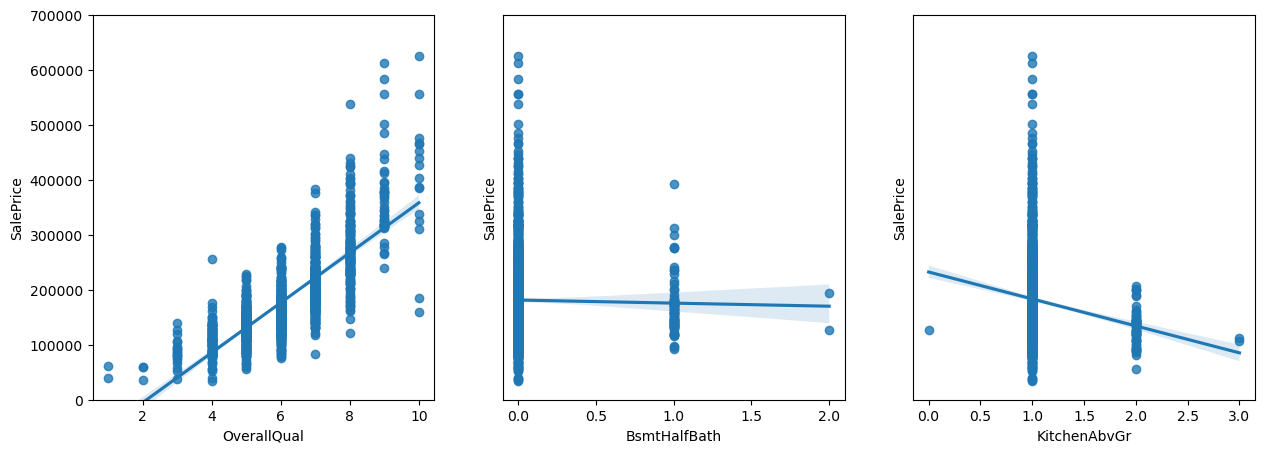

In [15]:
# Criando esse gráfico
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

sns.regplot(data=treino, x='OverallQual', y='SalePrice', ax=ax[0])
sns.regplot(data=treino, x='BsmtHalfBath', y='SalePrice', ax=ax[1])
sns.regplot(data=treino, x='KitchenAbvGr', y='SalePrice', ax=ax[2])

ax[0].set(ylim=(0, 700000))
ax[1].set(ylim=(0, 700000), yticks=[])
ax[2].set(ylim=(0, 700000), yticks=[])

plt.show()

- Podemos visualizar a correlação na forma de mapa de calor.

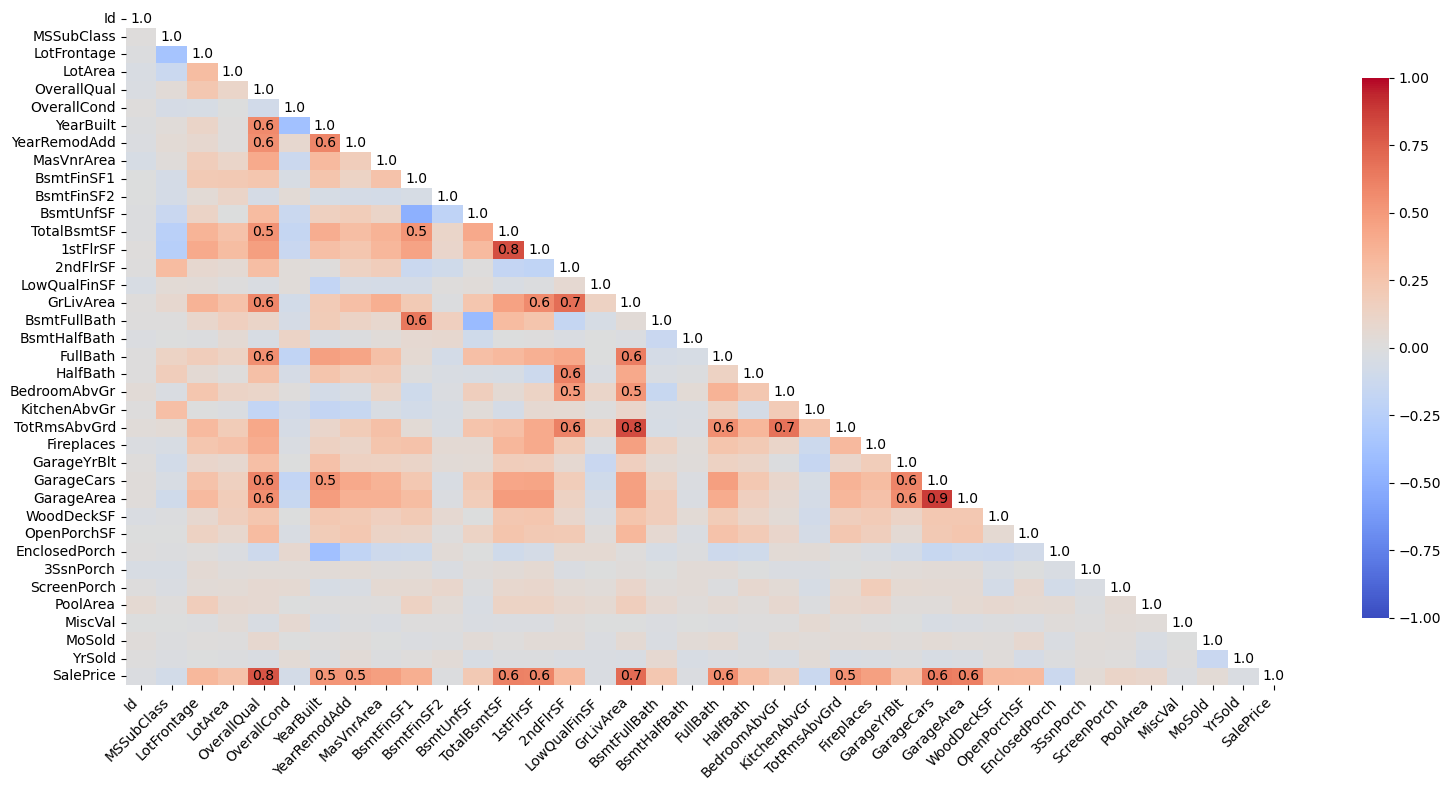

In [17]:
# Criando um mapa de calor das correlações mais fortes
import numpy as np

# Calculando a matriz de correlação
corr = treino_num.corr()

# Criando a máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurando o mapa de calor
fig, ax = plt.subplots(figsize=(16, 8))

# Plotando o mapa de calor com a máscara superior
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', vmax=1, vmin=-1, cbar_kws={"shrink": .8})

# Adicionando anotações apenas para as correlações mais fortes (abs(corr) > 0.5)
threshold = 0.5  # Critério para correlações fortes
for i in range(len(corr)):
    for j in range(len(corr)):
        if i >= j:  # Apenas parte inferior da máscara (inclui diagonal)
            value = corr.iloc[i, j]
            if abs(value) > threshold:
                ax.text(j + 0.5, i + 0.5, f'{value:.1f}',
                        ha='center', va='center', color='black')

# Ajustando os rótulos dos eixos e o layout
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

- **E para as variáveis categóricas podemos analisar se alguma delas possuem valores recorrentes, padrões. Por exemplo:**
    - Todas as casas "caras" possuem ar condicionado central e as casas "baratas" não.
    - Todas as casas "caras" possuem garagem e as casas "baratas" não.

In [19]:
# Selecionando as colunas que vamos trabalhar
obj_cols = treino.columns[treino.dtypes == 'object']
obj_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
# Visualizando as casas mais caras
caras = treino.sort_values('SalePrice').tail(10)

# Selecionando somente as colunas de texto
caras = caras[obj_cols]
caras.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
798,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
178,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial


In [21]:
# E também as casas mais baratas
baratas = treino.sort_values('SalePrice').head(10)

# Selecionando somente as colunas de texto
baratas = baratas[obj_cols]
baratas.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
495,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,GdWo,-1,WD,Abnorml
916,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml


In [22]:
# Verificando, das casas caras, valores que muito se repetem (muitos valores iguais)
caras_val = caras.nunique()
caras_val.head(3)

MSZoning    1
Street      1
Alley       1
dtype: int64

In [23]:
# Verificando agora para as casas mais baratas
baratas_val = baratas.nunique()
baratas_val.head(3)

MSZoning    3
Street      2
Alley       3
dtype: int64

In [24]:
# Podemos unir esses valores
rep = pd.concat([caras_val, baratas_val], axis=1).sort_values([0, 1]).head(10)
rep

,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


In [25]:
# Agora visualizando essas colunas para as casas mais caras
caras[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL


In [26]:
# E para as mais baratas
baratas[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all)
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all)
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all)
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all)


## Agora podemos investigar melhor essas colunas principais:
    - Utilities
    - CentralAir
    - PavedDrive
    - MSZoning
    - GarageQual

- <font color="blue">**Vamos começar primeiramente analisando a coluna Utilities.**</font>

In [29]:
# Verificando os valores nessa coluna para a base de treino
treino.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [30]:
# E para a base de teste
teste.Utilities.value_counts()

Utilities
AllPub    1459
Name: count, dtype: int64

In [31]:
# Eliminando essa coluna nas 2 bases
treino = treino.drop('Utilities', axis=1)
teste = teste.drop('Utilities', axis=1)

- <font color="blue">**Analisando a coluna CentralAir.**</font>

In [33]:
# Verificando os valores nessa coluna
treino.CentralAir.value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

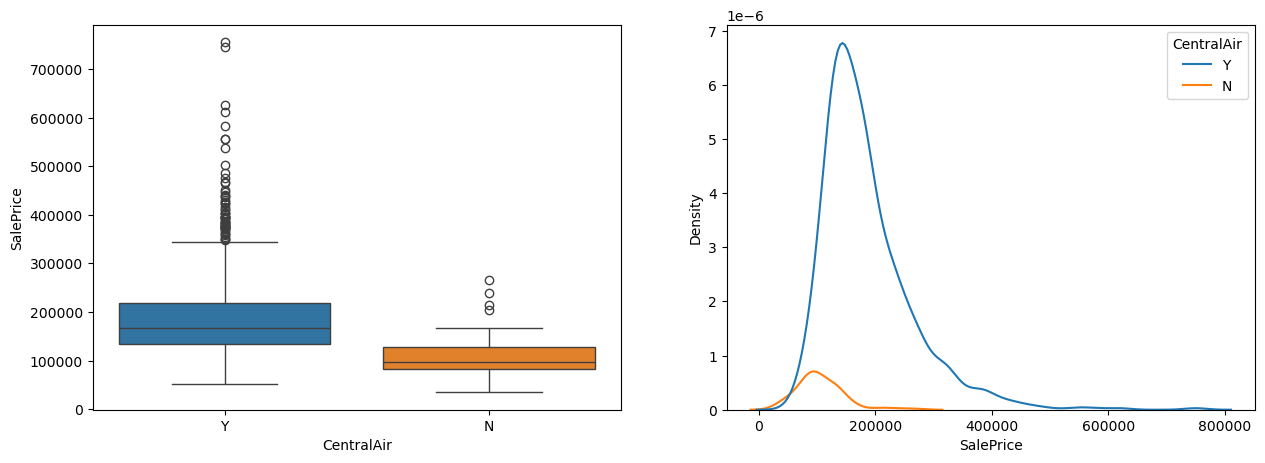

In [34]:
# Visualizando a relação com o preço
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.boxplot(x=treino.CentralAir, y=treino.SalePrice, hue=treino.CentralAir, ax=ax[0])
sns.kdeplot(x=treino.SalePrice, hue=treino.CentralAir, ax=ax[1])

plt.show()

- Os 2 gráficos acima indicam que o valor "N", apesar de aparecer na maioria das casas de menor valor, não é um valor tão frequente.
- **Podemos transformar essa coluna simplesmente colocando tudo que for `Y` como 1 e `N` como 0.**

In [36]:
# Substituindo os valores
treino['CentralAirCheck'] = treino.CentralAir
treino['CentralAir'] = treino.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)

In [37]:
# Verificando o resultado
treino[['CentralAirCheck', 'CentralAir']].value_counts()

CentralAirCheck  CentralAir
Y                1             1365
N                0               95
Name: count, dtype: int64

In [38]:
# Agora podemos apagar a coluna Check
treino = treino.drop('CentralAirCheck', axis=1)

- Fazendo o mesmo para a **<font color='blue'>base de teste.</font>**

In [40]:
# Aplicando a função na base de teste
teste['CentralAirCheck'] = teste.CentralAir
teste['CentralAir'] = teste.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)

In [41]:
# Verificando o resultado
teste[['CentralAirCheck', 'CentralAir']].value_counts()

CentralAirCheck  CentralAir
Y                1             1358
N                0              101
Name: count, dtype: int64

In [42]:
# Agora podemos apagar a coluna Check
teste = teste.drop('CentralAirCheck', axis=1)

- <font color="blue">**E também analisar a coluna PavedDrive** (calçada pavimentada):</font>
    - Y: Paved 
    - P: Partial Pavement
    - N: Dirt/Gravel

In [44]:
# Verificando os valores nessa coluna
treino.PavedDrive.value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [45]:
# Determinando a coluna analisada
coluna = 'PavedDrive'

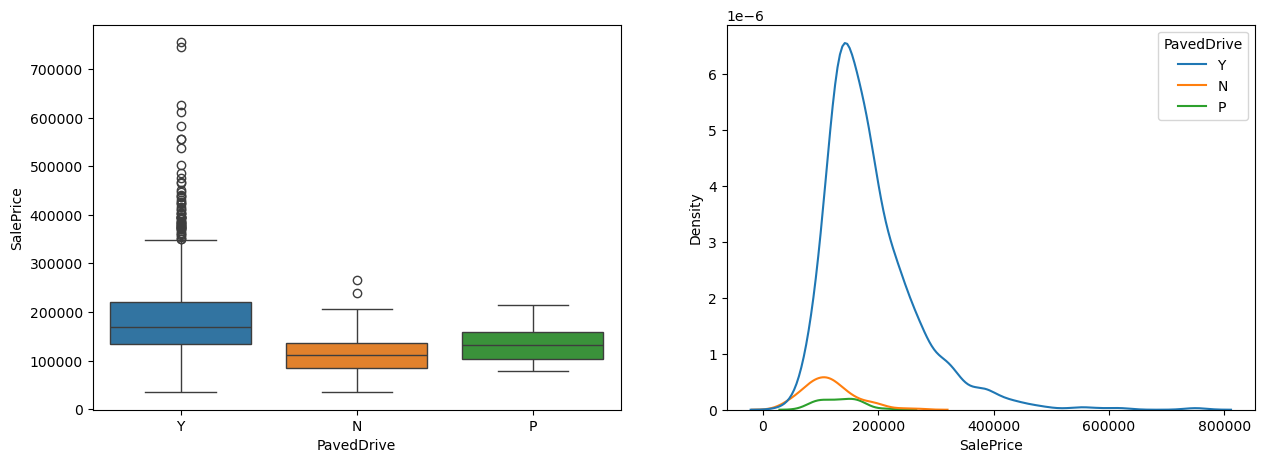

In [46]:
# Verificando a relação desses valores com o preço das casas
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.boxplot(x=treino[coluna], y=treino.SalePrice, hue=treino[coluna], ax=ax[0])
sns.kdeplot(x=treino.SalePrice, hue=treino[coluna], ax=ax[1])

plt.show()

- **Podemos criar uma função capaz de transformar esses valores de texto em números.**

In [48]:
# Criando a função
def DefinePavedDrive(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    elif x == 'P':
        return 0.5
    else:
        return -1

In [49]:
# Aplicando essa função
treino['PavedDriveCheck'] = treino.PavedDrive
treino['PavedDrive'] = treino.PavedDrive.apply(DefinePavedDrive)

In [50]:
# Verificando o resultado
treino[['PavedDriveCheck', 'PavedDrive']].value_counts()

PavedDriveCheck  PavedDrive
Y                1.0           1340
N                0.0             90
P                0.5             30
Name: count, dtype: int64

In [51]:
# Agora podemos apagar a coluna Check
treino = treino.drop('PavedDriveCheck', axis=1)

- E para a **<font color='blue'>base de teste.</font>**

In [53]:
# Fazendo para a base de teste
teste['PavedDriveCheck'] = teste.PavedDrive
teste['PavedDrive'] = teste.PavedDrive.apply(DefinePavedDrive)

In [54]:
# Verificando o resultado
teste[['PavedDriveCheck', 'PavedDrive']].value_counts()

PavedDriveCheck  PavedDrive
Y                1.0           1301
N                0.0            126
P                0.5             32
Name: count, dtype: int64

In [55]:
# Agora podemos apagar a coluna Check
teste = teste.drop('PavedDriveCheck', axis=1)

- <font color="blue">**Agora podemos entender a relação do MSZoning com o preço.**</font>

In [57]:
treino.MSZoning.value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [58]:
# Fazendo um groupby desses dados para ver a média
treino.groupby('MSZoning')['SalePrice'].mean().sort_values()

MSZoning
C (all)     74528.000000
RM         126316.830275
RH         131558.375000
RL         191004.994787
FV         214014.061538
Name: SalePrice, dtype: float64

In [59]:
# Visualizando também mínimo, máximo e contagem
treino.groupby(['MSZoning'])['SalePrice'].agg(['min', 'mean', 'median', 'max', 'count']).reset_index()

,MSZoning,min,mean,median,max,count
0,C (all),34900,74528.000000,74700.0,133900,10
1,FV,144152,214014.061538,205950.0,370878,65
2,RH,76000,131558.375000,136500.0,200000,16
3,RL,39300,191004.994787,174000.0,755000,1151
4,RM,37900,126316.830275,120500.0,475000,218


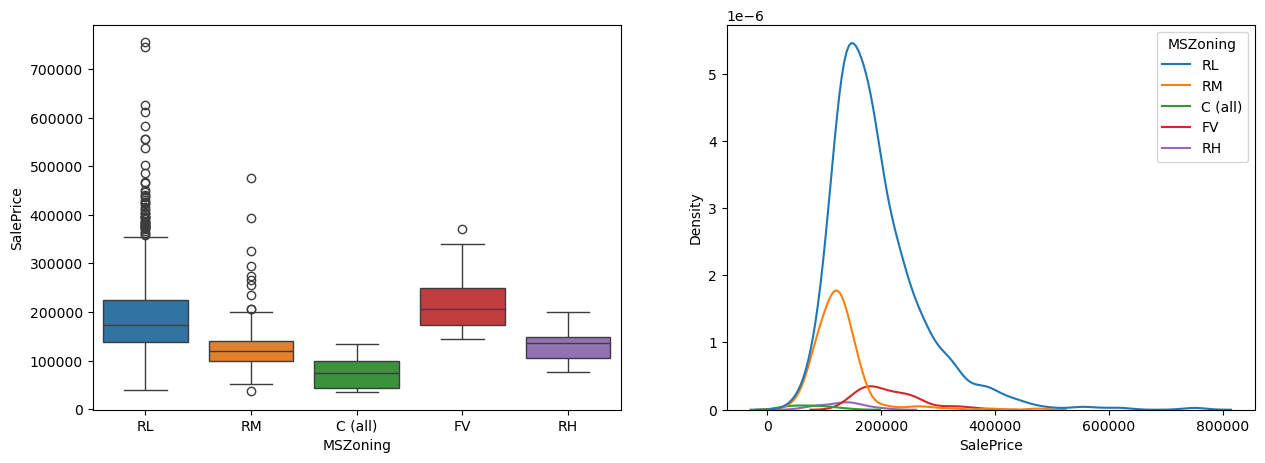

In [60]:
# Podemos inclusive visualizar a distribuição desses valores
coluna = 'MSZoning'
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.boxplot(x=treino[coluna], y=treino.SalePrice, hue=treino[coluna], ax=ax[0])
sns.kdeplot(x=treino.SalePrice, hue=treino[coluna], ax=ax[1])

plt.show()

- **Para resolver o problema de variáveis textuais, podemos utilizar agora o OneHotEncoder e transformar cada um desses valores em uma nova coluna:**
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [62]:
# Importando
from sklearn.preprocessing import OneHotEncoder

In [63]:
# Criando o encoder para essa coluna
ohe_MSZoning = OneHotEncoder(handle_unknown='ignore')

In [64]:
# Fazendo o fit com os dados
ohe_MSZoning = ohe_MSZoning.fit(treino[['MSZoning']])

In [65]:
# Transformando os dados
ohe_MSZoning.transform(treino[['MSZoning']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [66]:
# Podemos transformar isso em um DataFrame do pandas
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(treino[['MSZoning']]).toarray(), columns = ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


In [67]:
# Unindo essa coluna com a base
treino = pd.concat([treino, ohe_MSZoning_df], axis=1)

In [68]:
# Verificando o resultado
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,Inside,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,FR2,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,Inside,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,Corner,...,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0,0.0
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,FR2,...,12,2008,WD,Normal,250000,0.0,0.0,0.0,1.0,0.0


In [69]:
# Eliminando a coluna MSZoning
treino = treino.drop('MSZoning', axis=1)

- Agora utilizando o mesmo encoder para a **<font color='blue'>base de teste.</font>**

In [71]:
# Fazendo a transformação
ohe_MSZoning.transform(teste[['MSZoning']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [72]:
# Transformando em um DataFrame (podemos sobrescrever essa variável)
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(teste[['MSZoning']]).toarray(), columns= ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


In [73]:
# Unindo essa coluna com a base de teste
teste = pd.concat([teste, ohe_MSZoning_df], axis=1)

In [74]:
# Verificando o resultado
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1461,20,RH,80.0,11622,Pave,-1,Reg,Lvl,Inside,...,0,6,2010,WD,Normal,0.0,0.0,1.0,0.0,0.0
1,1462,20,RL,81.0,14267,Pave,-1,IR1,Lvl,Corner,...,12500,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
2,1463,60,RL,74.0,13830,Pave,-1,IR1,Lvl,Inside,...,0,3,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
3,1464,60,RL,78.0,9978,Pave,-1,IR1,Lvl,Inside,...,0,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
4,1465,120,RL,43.0,5005,Pave,-1,IR1,HLS,Inside,...,0,1,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0


In [75]:
# Eliminando a coluna MSZoning
teste = teste.drop('MSZoning', axis=1)

- <font color="blue">**Analisando as informações sobre garagem, começando pela GarageQual**</font>
    - Ex: Excellent
    - Gd: Good
    - TA: Typical/Average
    - Fa: Fair
    - Po: Poor
    - NA: No Garage -> lembrando que já substituimos esse valor por -1

In [77]:
# Verificando os valores nessa coluna
treino.GarageQual.value_counts()

GarageQual
TA    1311
-1      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

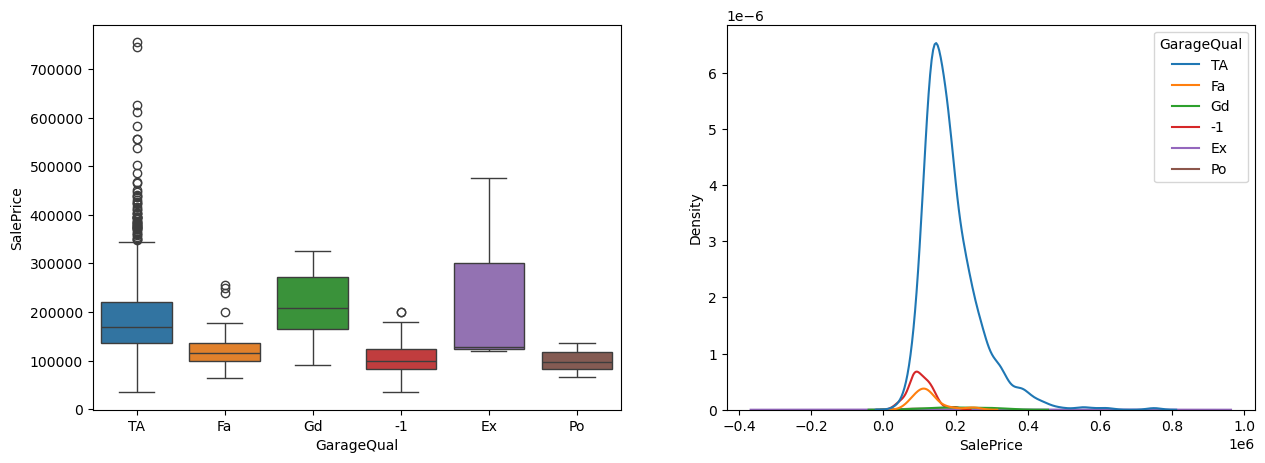

In [78]:
# Visualizando graficamente
coluna = 'GarageQual'

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.boxplot(x=treino[coluna], y=treino.SalePrice, hue=treino[coluna], ax=ax[0])
sns.kdeplot(x=treino.SalePrice, hue=treino[coluna], ax=ax[1])

plt.show()

 - No bloxplot acima percebe-se que:
     -  **garagens com qualidade Ex (excelente) e Gd (boa) valorizam o valor da casa.**
     -  **garagens com qualidade ruim (Fa e Po) e a falta de garagem (valor -1) diminuem o valor médio das casas.**

- **Pelo arquivo data_description percebemos que existem várias colunas de garagem (já havíamos notado isso na etapa de Data Cleaning), então podemos visualizar essas informações:**

In [81]:
# Verificando as colunas que possuem garagem no nome
cols_garagem = treino.columns[treino.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [82]:
# Visualizando os valores nessa base
treino[cols_garagem].head(6)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA
5,Attchd,1993.0,Unf,2,480,TA,TA


- Analisando **GarageQual** e **GarageCond**, que tem classificações semelhantes.

In [84]:
# Fazendo o value_counts
treino[['GarageQual', 'GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            1291
-1          -1              81
Fa          TA              24
            Fa              20
TA          Fa              15
Gd          TA              10
TA          Gd               5
Fa          Po               4
Gd          Gd               4
Po          Po               3
Ex          Ex               2
            TA               1
Name: count, dtype: int64

In [85]:
# Verificando % de valores em que GarageQual é igual a GarageCond
treino[treino.GarageQual == treino.GarageCond].shape[0]/treino.shape[0]

0.9595890410958904

- **Podemos apagar a coluna GarageCond pois a informação nessa coluna diz basicamente a mesma coisa que a coluna GarageQual.**
    - Isso inclusive fará com que o modelo fique mais correto, pois não dará ao estado da garagem um peso maior do que ela realmente tem - o que ocorre por termos 1 variável para qualidade e outra para condição.

In [87]:
# Apagando a coluna GarageCond
treino = treino.drop('GarageCond', axis=1)

- **Da mesma forma, também podemos analisar a relação entre GarageCars e GarageArea.**

In [89]:
# Analisando a correlação entre as duas colunas e o preço
treino[['GarageCars', 'GarageArea', 'SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


- **As colunas GarageCars e GarageArea tem uma correlação muito forte, obviamente porque quanto mais carros cabem na garagem, maior a area da mesma.**
    - Vamos eliminar a coluna GarageArea, por tem uma correlação menor com a coluna alvo.

In [91]:
# Eliminando a coluna GarageArea
treino = treino.drop('GarageArea', axis=1)

In [92]:
# Verificando as colunas que possuem garagem no nome
cols_garagem = treino.columns[treino.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual'],
      dtype='object')

- **Podemos continuar tratando as colunas de garagem, mas relacionando com outras informações da base como YearBuilt e YearRemodAdd**

In [94]:
# Analisando a correlação entre as datas de construção
treino[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.272009,0.146341,0.261354
YearBuilt,0.272009,1.000000,0.592855,0.522897
YearRemodAdd,0.146341,0.592855,1.000000,0.507101
SalePrice,0.261354,0.522897,0.507101,1.000000


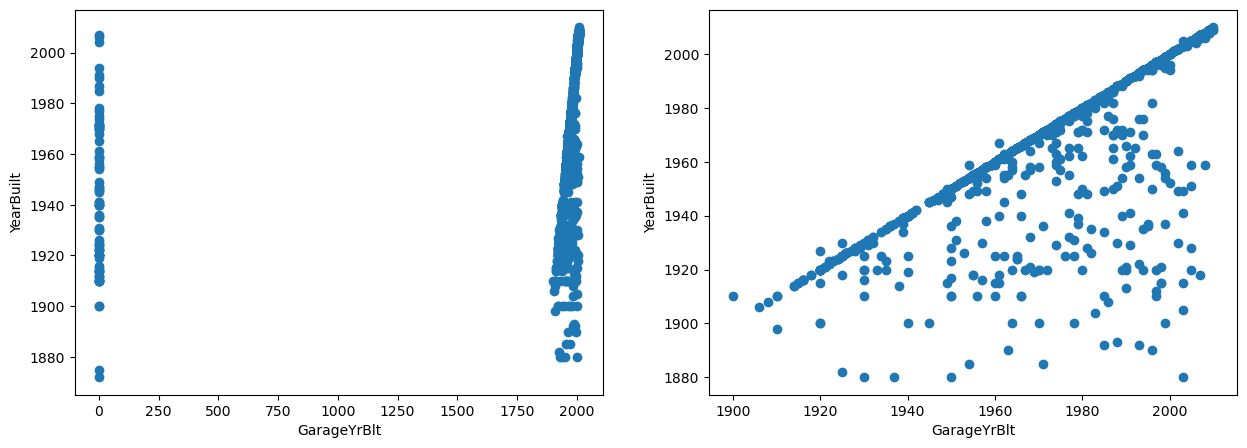

In [95]:
# Visualizando graficamente a correlação entre GarageYrBlt e YearBuilt
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# Considerando todas as casas
ax[0].scatter(treino.GarageYrBlt, treino.YearBuilt)

# Considerando apenas casas que possuem garagem
ax[1].scatter(treino.loc[treino.GarageYrBlt != -1, 'GarageYrBlt'], treino.loc[treino.GarageYrBlt != -1, 'YearBuilt'])

ax[0].set(xlabel= 'GarageYrBlt')
ax[0].set(ylabel= 'YearBuilt')
ax[1].set(xlabel= 'GarageYrBlt')
ax[1].set(ylabel= 'YearBuilt')

plt.show()

- **Parece que há uma correlação significativa entre o ano de construção da garagem com o ano de construção da casa, o 'problema' está nas casas que não possuem garagem.**

In [97]:
# Analisando a correlação sem os valores onde o ano é -1 (casas sem garagem)
treino.loc[treino.GarageYrBlt != -1, ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.825667,0.642277,0.486362
YearBuilt,0.825667,1.000000,0.618058,0.507584
YearRemodAdd,0.642277,0.618058,1.000000,0.505434
SalePrice,0.486362,0.507584,0.505434,1.000000


- **Como a coluna GarageYrBlt é, das 3, a que tem a menor correlação com a coluna alvo, vamos eliminá-la.**

In [99]:
# Eliminando a coluna de GarageYrBlt
treino = treino.drop('GarageYrBlt', axis=1)

- **Por fim, podemos continuar tratando as colunas de garagem ou apenas transformar o restante das colunas de texto:**
    - Utilizando o OneHotEncoder para a coluna GarageType
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    - E o OrdinalEncoder para as colunas GarageFinish e GarageQual
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [101]:
# Visualizando os valores em GarageType
treino.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
-1          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [102]:
# Criando um encoder para GarageType
ohe_GarageType = OneHotEncoder(min_frequency= 25, handle_unknown='ignore')

In [103]:
# Fazendo o fit
ohe_GarageType.fit(treino[['GarageType']])

OneHotEncoder(handle_unknown='ignore', min_frequency=25)

In [104]:
# Fazendo o transform já em um DataFrame
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(treino[['GarageType']]).toarray(), columns= ohe_GarageType.get_feature_names_out(), dtype=int)
ohe_GarageType_df.head(3)

,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0


In [105]:
# Unindo essa coluna com a base
treino = pd.concat([treino, ohe_GarageType_df], axis=1)

In [106]:
# Eliminando a coluna GarageType
treino = treino.drop('GarageType', axis=1)

- **Vamos fazer o OrdinalEncoder para as outras 2 colunas:**
    - GarageFinish: Interior finish of the garage
        - Fin: Finished
        - RFn: Rough Finished	
        - Unf: Unfinished
        - NA: No Garage -> usamos o -1
    - GarageQual: Garage quality
        - Ex: Excellent
        - Gd: Good
        - TA: Typical/Average
        - Fa: Fair
        - Po: Poor
        - NA: No Garage

In [108]:
# Criando a lista de ordem dos valores
GarageFinish_oe = ['Unf', 'RFn', 'Fin']
GarageQual_oe = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

In [109]:
# Importando o OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [110]:
# Criando o encoder
oe_garagem = OrdinalEncoder(categories= [GarageFinish_oe, GarageQual_oe], handle_unknown='use_encoded_value', unknown_value=-1, dtype=int)

In [111]:
# Fazendo o fit com os dados
oe_garagem = oe_garagem.fit(treino[['GarageFinish', 'GarageQual']])

In [112]:
# Transformando
oe_garagem.transform(treino[['GarageFinish', 'GarageQual']])

array([[1, 2],
       [1, 2],
       [1, 2],
       ...,
       [1, 2],
       [0, 2],
       [2, 2]])

In [113]:
# Substituindo na base de treino
treino[['GarageFinishCheck', 'GarageQualCheck']] = treino[['GarageFinish', 'GarageQual']]
treino[['GarageFinish', 'GarageQual']] = oe_garagem.transform(treino[['GarageFinish', 'GarageQual']])

In [114]:
# Visualizando o resultado
treino.head(3)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn,GarageFinishCheck,GarageQualCheck
0,1,60,65.0,8450,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0,1,0,0,0,RFn,TA
1,2,20,80.0,9600,Pave,-1,Reg,Lvl,FR2,Gtl,...,0.0,1.0,0.0,0,1,0,0,0,RFn,TA
2,3,60,68.0,11250,Pave,-1,IR1,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0,1,0,0,0,RFn,TA


In [115]:
# Agrupando os dados de GarageFinish
treino[['GarageFinish', 'GarageFinishCheck']].value_counts()

GarageFinish  GarageFinishCheck
 0            Unf                  605
 1            RFn                  422
 2            Fin                  352
-1            -1                    81
Name: count, dtype: int64

In [116]:
# E de GarageQual
treino[['GarageQual', 'GarageQualCheck']].value_counts()

GarageQual  GarageQualCheck
 2          TA                 1311
-1          -1                   81
 1          Fa                   48
 3          Gd                   14
 0          Po                    3
 4          Ex                    3
Name: count, dtype: int64

In [117]:
# E então apagando essas duas colunas de check
treino = treino.drop(['GarageFinishCheck', 'GarageQualCheck'], axis=1)

- Fazendo todos os tratamentos para a **<font color='blue'>base de teste.</font>**

In [119]:
# Apagando a coluna GarageCond
teste = teste.drop('GarageCond', axis=1)

In [120]:
# Eliminando a coluna GarageArea
teste = teste.drop('GarageArea', axis=1)

In [121]:
# Também podemos eliminar essa coluna de GarageYrBlt
teste = teste.drop('GarageYrBlt', axis=1)

In [122]:
# Utilizando o encoder do GarageType
# Fazendo o transform já em um DataFrame
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(teste[['GarageType']]).toarray(), columns= ohe_GarageType.get_feature_names_out(), dtype=int)

# Unindo essa coluna com a base
teste = pd.concat([teste, ohe_GarageType_df], axis=1)

# Eliminando a coluna GarageType
teste = teste.drop('GarageType', axis=1)

In [123]:
# Utilizando o OrdinalEncoder para as colunas GarageFinish e GarageQual
# Transformando e substituindo na base de treino
teste[['GarageFinish', 'GarageQual']] = oe_garagem.transform(teste[['GarageFinish', 'GarageQual']])

### Salvando para testar o modelo.

In [125]:
# Salvando para vermos como está o modelo
treino.to_csv('train_3_1.csv', index=False)
teste.to_csv('test_3_1.csv', index=False)

### 

## Finalizando o tratamento das outras colunas que ainda estão como texto.

In [128]:
# Verificando novamente a quantidade de colunas de cada tipo
treino.dtypes.value_counts()

int64      35
object     35
float64     8
int32       7
Name: count, dtype: int64

In [129]:
# Visualizando o nome das colunas
treino.columns[treino.dtypes == 'object']

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

- **Podemos separar agora as colunas em 2 grupos: um que podemos fazer o OneHotEncoder e outra que podemos fazer o OrdinalEncoder.**

In [131]:
# Separando as colunas pelos índices
colunas_ohe = [0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 24, 26, 28, 31, 32, 33, 34]
colunas_oe = [2, 5, 16, 17, 19, 20, 21, 22, 23, 25, 27, 29, 30]

In [132]:
# Podemos visualizar as colunas do ohe
cols_ohe = treino.columns[treino.dtypes == 'object'][colunas_ohe]
cols_ohe

Index(['Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'Functional', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [133]:
# E do oe
cols_oe = treino.columns[treino.dtypes == 'object'][colunas_oe]
cols_oe

Index(['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'PoolQC'],
      dtype='object')

In [134]:
# Definindo a ordem dos valores de cada coluna do OrdinalEncoder
dados_oe = []
dados_oe.append(['IR3', 'IR2', 'IR1', 'Reg']) # LotShape
dados_oe.append(['Sev', 'Mod', 'Gtl']) # LandSlope
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) # ExterQual
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) # ExterCond
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) # BsmtQual
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) # BsmtCond
dados_oe.append(['No', 'Mn', 'Av', 'Gd']) # BsmtExposure
dados_oe.append(['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']) # BsmtFinType1
dados_oe.append(['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']) # BsmtFinType2
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) # HeatingQC
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) # KitchenQual
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) # FireplaceQu
dados_oe.append(['Fa', 'TA', 'Gd', 'Ex']) # PoolQC

- **Fazendo o OneHotEncoder.**

In [136]:
# Criando o encoder
ohe = OneHotEncoder(handle_unknown= 'infrequent_if_exist', min_frequency= 50, drop= 'if_binary', dtype= 'int64')

In [137]:
# Selecionando a base do ohe
dados_ohe = treino[cols_ohe]
dados_ohe.head(3)

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal
1,Pave,-1,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,MetalSd,-1,CBlock,GasA,SBrkr,Typ,-1,-1,WD,Normal
2,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal


In [138]:
# Fazando o fit
ohe = ohe.fit(dados_ohe)

In [139]:
# Fazendo o transform já em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(dados_ohe).toarray(), columns= ohe.get_feature_names_out())
ohe_df.head(3)

,Street_infrequent_sklearn,Alley_-1,Alley_Grvl,Alley_infrequent_sklearn,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LandContour_infrequent_sklearn,LotConfig_Corner,LotConfig_CulDSac,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [140]:
# Unindo esse df com a base
treino = pd.concat([treino, ohe_df], axis=1)
treino.head(3)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1,60,65.0,8450,Pave,-1,Reg,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0
1,2,20,80.0,9600,Pave,-1,Reg,Lvl,FR2,Gtl,...,0,0,0,0,1,0,0,1,0,0
2,3,60,68.0,11250,Pave,-1,IR1,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0


- Para os **<font color='blue'>dados de teste.</font>**

In [142]:
# Selecionando a base do ohe
dados_ohe_teste = teste[cols_ohe]
dados_ohe_teste.head(3)

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,...,VinylSd,-1,CBlock,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal
1,Pave,-1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,-1,Gar2,WD,Normal
2,Pave,-1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,-1,PConc,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal


In [143]:
# Fazendo o ohe para teste
ohe_teste_df = pd.DataFrame(ohe.transform(dados_ohe_teste).toarray(), columns= ohe.get_feature_names_out())
teste = pd.concat([teste, ohe_teste_df], axis=1)
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1461,20,80.0,11622,Pave,-1,Reg,Lvl,Inside,Gtl,...,1,0,0,0,1,0,0,1,0,0
1,1462,20,81.0,14267,Pave,-1,IR1,Lvl,Corner,Gtl,...,0,0,1,0,1,0,0,1,0,0
2,1463,60,74.0,13830,Pave,-1,IR1,Lvl,Inside,Gtl,...,1,0,0,0,1,0,0,1,0,0


- **Fazendo o OrdinalEncoder.**

In [145]:
# Criando o encoder
oe = OrdinalEncoder(categories= dados_oe, handle_unknown= 'use_encoded_value', unknown_value= -1, dtype= 'int64')

In [146]:
# Selecionando a base do oe
dados_oe = treino[cols_oe]
dados_oe.head(3)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,-1,-1
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,-1
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,-1


In [147]:
# Fazando o fit
oe = oe.fit(dados_oe)

In [148]:
# Fazendo o transform já na base
treino[cols_oe] = oe.transform(dados_oe)

- Também para os **<font color='blue'>dados de teste.</font>**

In [150]:
# Selecionando a base do oe
dados_oe_teste = teste[cols_oe]
dados_oe_teste.head(3)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,TA,-1,-1
1,IR1,Gtl,TA,TA,TA,TA,No,ALQ,Unf,TA,Gd,-1,-1
2,IR1,Gtl,TA,TA,Gd,TA,No,GLQ,Unf,Gd,TA,TA,-1


In [151]:
# Transformando
teste[cols_oe] = oe.transform(dados_oe_teste)

- **Eliminando as colunas do ohe**
    - Vamos eliminar só agora para não ter problema com os índices que usamos acima.

In [153]:
# Eliminando as colunas do ohe
treino = treino.drop(cols_ohe, axis=1)
teste = teste.drop(cols_ohe, axis=1)

In [154]:
treino.dtypes.value_counts()

int64      131
float64      8
int32        7
Name: count, dtype: int64

In [155]:
teste.dtypes.value_counts()

int64      123
float64     15
int32        7
Name: count, dtype: int64

- **Para finalizar, podemos extrair essa base para o excel.**

In [157]:
# Exportando para o excel
treino.to_csv('train_3_2.csv', index=False)
teste.to_csv('test_3_2.csv', index=False)